In [94]:
#pick libraries I want to use
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn import metrics

#create objects to work on (tables) - paste the link of the files from the folder in the left
dead_people = pd.read_csv("/content/celebsdeathDS.csv")


#Lets go!

In [95]:
dead_people

,Name,Short description,Gender,Country,Occupation,occupation_category,Birth_year,Death_year,Manner of death,couse_of_death,Age_of_death
0,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,Politician,1732,1799,natural causes,natural causes,67
1,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,Artist,1952,2001,natural causes,natural causes,49
2,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,Politician,1809,1865,homicide,homicide,56
3,Jean-François Champollion,French classical scholar,Male,Kingdom of France; First French Empire,Egyptologist,other,1790,1832,natural causes,natural causes,42
4,Claude Monet,French impressionist painter (1840-1926),Male,France,Artist,Artist,1840,1926,natural causes,natural causes,86
...,...,...,...,...,...,...,...,...,...,...,...
52203,Eva Reynal,French actor,Female,France,Artist,Artist,1893,1939,suicide,suicide,46
52204,Adrian Lillebekk Ovlien,association football player (1997-2018),Male,Norway,Athlete,Athlete,1997,2018,natural causes,natural causes,21
52205,Cyril Buxton,cricketer (1865-1892),Male,United Kingdom of Great Britain and Ireland,Athlete,Athlete,1865,1892,suicide,suicide,27
52206,William E. Beltz,Inuit politician,Male,NaN,Politician,Politician,1912,1960,natural causes,natural causes,48


הקשר בין גיל לצורת המוות

In [96]:
df = dead_people[['Age_of_death','couse_of_death']]
stat_df = df.groupby(['couse_of_death'],as_index=False)['Age_of_death'].mean().rename(columns={"Age_of_death": "Age_of_death"})
stat_df

,couse_of_death,Age_of_death
0,accident,48.395453
1,capital punishment,43.227626
2,homicide,44.582615
3,natural causes,64.910833
4,suicide,48.517004
5,unnatural death,46.451923
6,war,35.371930


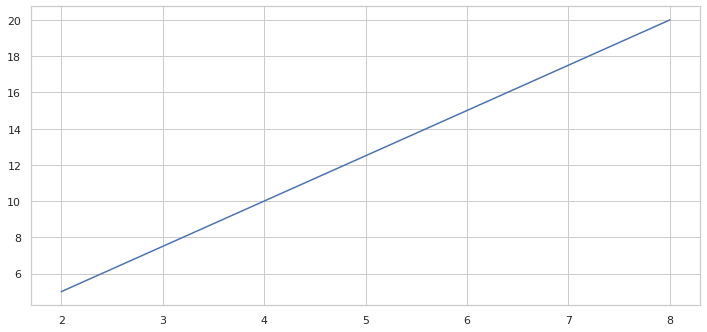

<BarContainer object of 7 artists>

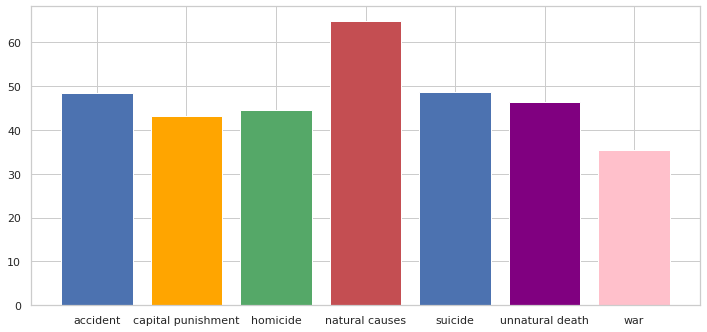

In [97]:
# Import Library

import matplotlib.pyplot as plt

# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (12,5.5)

# Define Data

x = [2, 4, 6, 8]
y = [5, 10, 15, 20]

# Plot

plt.plot(x, y)

# Display

plt.show()
matplotlib.pyplot.bar(x='couse_of_death', height='Age_of_death', width=0.8,data=stat_df,color=['b','orange','g','r','b','purple','pink'])


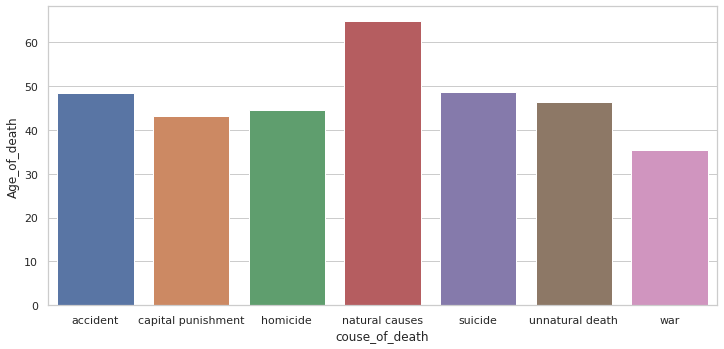

In [98]:
#show aerage age for each death cause
stat_df = df.groupby(['couse_of_death'],as_index=False)['Age_of_death'].mean()
sns.set_theme(style="whitegrid")
chart = sns.barplot(x="couse_of_death", y="Age_of_death",data=stat_df,ci=None)
#chart.bar_label(chart.containers[0])


הקשר בין מקצוע (אמן, פוליטיקאי,דמות דתית,חייל) לצורת המוות

In [99]:
df = dead_people[['couse_of_death','occupation_category']]
df = df[df.occupation_category.isin(['Artist','Politician','Religious figure','spy/soldier'])]
df['count'] = df['couse_of_death']
stat_df = df.groupby(['occupation_category','couse_of_death'],as_index=False)['count'].count()
stat_df

,occupation_category,couse_of_death,count
0,Artist,accident,1310
1,Artist,capital punishment,296
2,Artist,homicide,611
3,Artist,natural causes,14786
4,Artist,suicide,2079
5,Artist,unnatural death,51
6,Artist,war,16
7,Politician,accident,640
8,Politician,capital punishment,852
9,Politician,homicide,1244


Text(0.5, 1.0, 'spy/soldier')

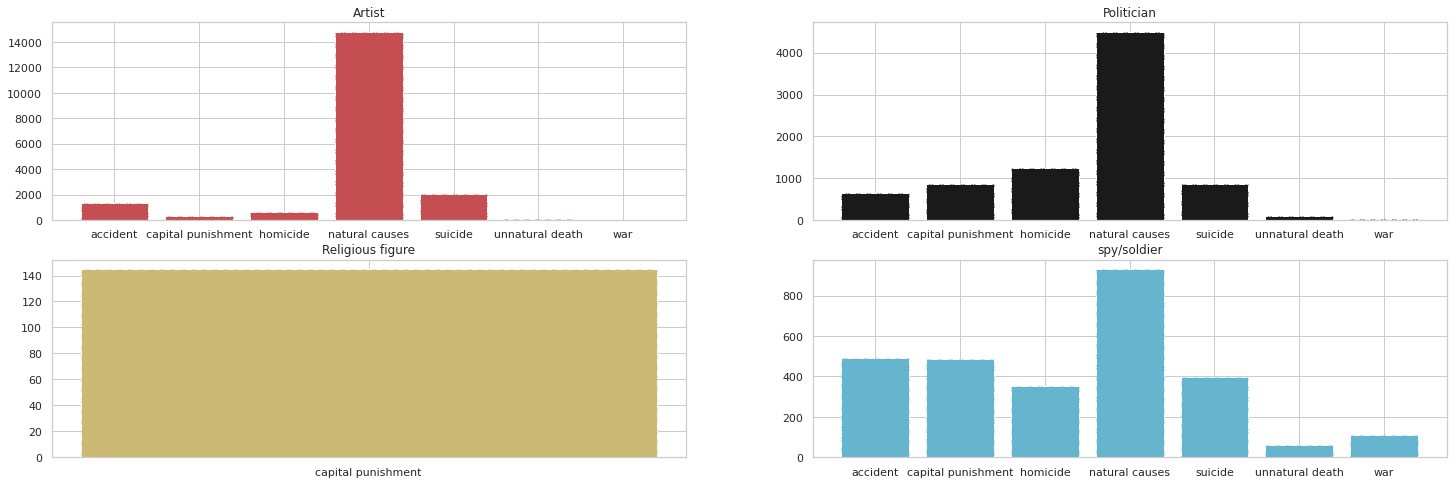

In [100]:
df1=stat_df[stat_df.occupation_category =='Artist']
df2=stat_df[stat_df.occupation_category =='Politician']
df3=stat_df[stat_df.occupation_category =='Religious figure']
df4=stat_df[stat_df.occupation_category =='spy/soldier']
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(2, 2, figsize=(25,8))
x1 = list(df1['couse_of_death'])
y1 = list(df1['count'])
x2 = list(df2['couse_of_death'])
y2 = list(df2['count'])
x3 = list(df3['couse_of_death'])
y3 = list(df3['count'])
x4 = list(df4['couse_of_death'])
y4 = list(df4['count'])

ax[0, 0].bar(x1, y1, color='r',linestyle='-.')
ax[0, 1].bar(x2, y2, color='k', linestyle='-.')
ax[1, 0].bar(x3, y3, color='y', linestyle='-.')
ax[1, 1].bar(x4, y4, color='c',linestyle='-.')
ax[0, 0].set_title("Artist")
ax[0, 1].set_title("Politician")
ax[1, 0].set_title("Religious figure")
ax[1, 1].set_title("spy/soldier")



הקשר בין מקצוע (אמן, פוליטיקאי,דמות דתית,חייל) לגיל המוות

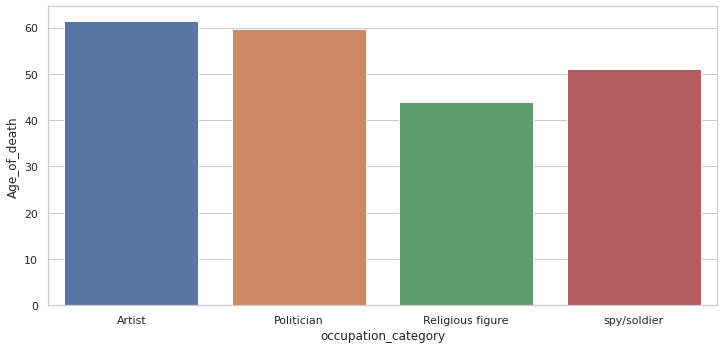

In [101]:
df = dead_people[['occupation_category','Age_of_death']]
df = df[df.occupation_category.isin(['Artist','Politician','Religious figure','spy/soldier'])]
df['mean'] = df['Age_of_death']
df
stat_df = df.groupby(['occupation_category'],as_index=False)['Age_of_death'].mean()
stat_df
#stat_df = df.groupby(['couse_of_death'],as_index=False)['Age_of_death'].mean()
sns.set_theme(style="whitegrid")
chart = sns.barplot(x="occupation_category", y="Age_of_death",data=stat_df,ci=None)

הפופולאריות של הוצאות להורג לפי שנים

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


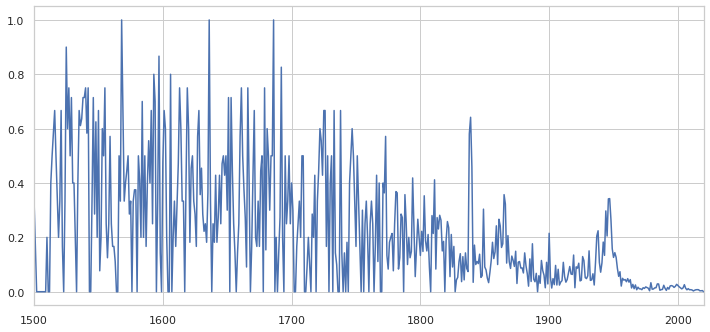

In [113]:
#כל מקרי המוות המתועדים בשנה מסוימת חלקי סך מקרי המוות בשנה זו מהסיבה הספציפית
df = dead_people[['couse_of_death','Death_year']]
df['capital_punishment']=df['couse_of_death']
#changing column val using loc func
df['capital_punishment'] = np.where(df['couse_of_death']=='capital punishment', 1, 0)

stat_df = df.groupby(['Death_year'],as_index=False)['capital_punishment'].count()
stat_df2 = df.groupby(['Death_year'],as_index=False)['capital_punishment'].sum()
#list for percentage 
x=list(stat_df['Death_year'])
y1 = list(stat_df['capital_punishment'])
y2 = list(stat_df2['capital_punishment'])
ls=[]
for i in range(0,len(x)):
  ls.append(y2[i]/y1[i])

plt.rcParams["figure.figsize"] = (12,5.5)

# Plot
plt.plot(x, ls)
plt.xlim(1500,2020)
# Display
plt.show()


האם ניתן לחזות לפי מקצוע (אמן, פוליטיקאי,דמות דתית,חייל),מדינה,גיל, צורת המוות הלא טבעי

In [125]:
df = dead_people
df = df[df.occupation_category.isin(['Artist','Politician','Religious figure','spy/soldier'])]
df=df[['Gender','Country','occupation_category','Birth_year','Death_year','Age_of_death','couse_of_death']]
df=df[df.Gender.isin(["Male","Female"])]
#dropnan on other parameters
df = df.dropna(axis=0)
df

,Gender,Country,occupation_category,Birth_year,Death_year,Age_of_death,couse_of_death
0,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799,67,natural causes
1,Male,United Kingdom,Artist,1952,2001,49,natural causes
2,Male,United States of America,Politician,1809,1865,56,homicide
4,Male,France,Artist,1840,1926,86,natural causes
5,Male,United States of America,Artist,1935,1977,42,natural causes
...,...,...,...,...,...,...,...
52191,Male,Croatia,Artist,1951,2019,68,natural causes
52196,Male,United States of America,Politician,1899,1967,68,natural causes
52197,Female,Venezuela,Artist,1957,2018,61,natural causes
52202,Female,United States of America,Politician,1945,2017,72,natural causes


In [131]:
from sklearn import preprocessing
#label 3 columns
gender = set(df['Gender'].values)
le = preprocessing.LabelEncoder()
le.fit(list(gender))
le.classes_
le.transform(list(set(list(df['Gender']))))
l = le.transform(df['Gender'].values)
df['Gender'] = l
###############################################333
country = set(df['Country'].values)
le = preprocessing.LabelEncoder()
le.fit(list(country))
le.classes_
le.transform(list(set(list(df['Country']))))
l = le.transform(df['Country'].values)
df['Country'] = l
#################################################
occupation_category = set(df['occupation_category'].values)
le = preprocessing.LabelEncoder()
le.fit(list(occupation_category))
le.classes_
le.transform(list(set(list(df['occupation_category']))))
l = le.transform(df['occupation_category'].values)
df['occupation_category'] = l
#################################################

#df.insert(0,'cause',0)
df['cause']=df['couse_of_death']
df

,cause,Gender,Country,occupation_category,Birth_year,Death_year,Age_of_death,couse_of_death
0,natural causes,1,1107,1,1732,1799,67,natural causes
1,natural causes,1,1017,0,1952,2001,49,natural causes
2,homicide,1,1052,1,1809,1865,56,homicide
4,natural causes,1,266,0,1840,1926,86,natural causes
5,natural causes,1,1052,0,1935,1977,42,natural causes
...,...,...,...,...,...,...,...,...
52191,natural causes,1,185,0,1951,2019,68,natural causes
52196,natural causes,1,1052,1,1899,1967,68,natural causes
52197,natural causes,0,1173,0,1957,2018,61,natural causes
52202,natural causes,0,1052,1,1945,2017,72,natural causes


In [132]:
#first, test train split
train_df, test_df = train_test_split(df, test_size=0.2)

#model creation
knn_classifier = KNeighborsClassifier(n_neighbors=3)
featues_list = list(df.columns)[1:len(df.columns)-1]
knn_classifier.fit(train_df[featues_list], train_df["couse_of_death"].values) #change to something more generic for the project 
#test
class_values_test_list= test_df["couse_of_death"].values
predict_class_list = knn_classifier.predict(test_df[featues_list])
predict_class_list


array(['capital punishment', 'suicide', 'capital punishment', ...,
       'natural causes', 'natural causes', 'natural causes'], dtype=object)

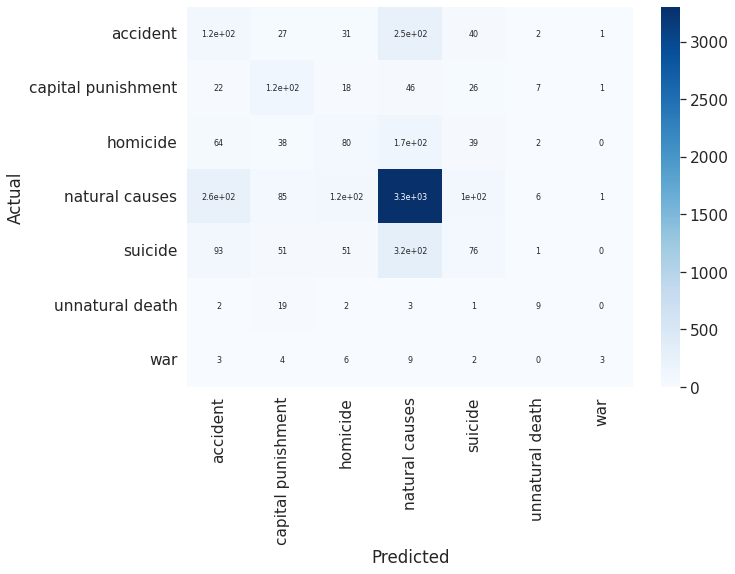

In [133]:
#assembling a confusion metrics as a heat map
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = metrics.confusion_matrix(class_values_test_list,predict_class_list)
df_cm = pd.DataFrame(cm, columns=knn_classifier.classes_, index = knn_classifier.classes_)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 8})# font size

מודל זוועה

חיזוי גיל המוות לפי שנת המוות

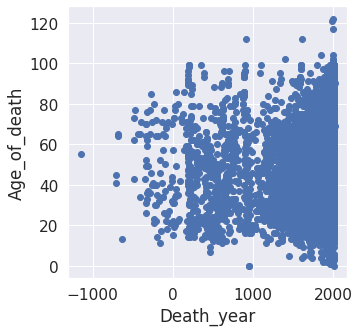

In [138]:
df =dead_people[['Age_of_death','Death_year']]
#correlation
plt.rcParams['figure.figsize'] = [5,5]
plt.scatter(df['Death_year'], df['Age_of_death'])
plt.xlabel("Death_year")
plt.ylabel("Age_of_death")
#plt.set_title("correlation")

plt.show()

y=[0.01821872]x+22.909127996367985


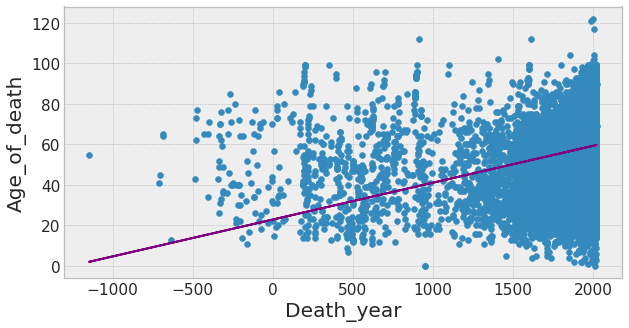

In [140]:


#creating the liniar regression

linreg = LinearRegression()
sqrt_list_of_list = [[i] for i in df['Death_year'].values] 
linreg.fit(sqrt_list_of_list, df['Age_of_death'].values)
linreg.coef_ # coefficent b_0
linreg.intercept_ # b_1
print(f'y={linreg.coef_}x+{linreg.intercept_}')
linear_func = lambda x: linreg.coef_[0]*x + linreg.intercept_
predict_death_age = [linear_func(x) for x in df['Death_year']]

#creating the visualization
plt.figure(figsize=(10,5))
plt.style.use('bmh')
plt.scatter(df['Death_year'], df['Age_of_death'])
plt.xlabel("Death_year")
plt.ylabel("Age_of_death")

plt.plot(df['Death_year'],predict_death_age, color='purple' )